# K-Means
K-Means Clustering is a popular clustering algorithm. The goal of it is to find groups (clusters) in the given data.

Basically it aims to transform the image on the left (below), into the image on the right.
![cluster example](https://i.imgur.com/S65Sk9c.jpg)

### Use Cases
It's widely used but some examples are:
* Image Segmentation
* Clustering Gene Segmentation Data
* News Article Clustering
* Clustering Languages
* Species Clustering
* Anomaly Detection

## Algorithm
Our algorithm works as follows, assuming we have inputs $x_1, x_2, x_3,...,x_n$ and value of K
1. Pick K random points as cluster centers, called **centroids**
2. Assign each $x_i$ to nearest cluster by calculating its distance to each centroid
3. Find new cluster center by taking average of the assigned points
4. Repeat Steps 2. and 3. until none of the cluster assignments change.

All in all, it'll look something like this:
![K means gif](https://i.imgur.com/k4XcapI.gif)

#### Step 1
We randomly pick K cluster centers (centroids). Lets assume these are $c_1,c_2,...,c_k$, and we can say that

$$C = c_1,c_2,...,c_k$$

$C$ is the set of all centroids.

#### Step 2
In this step we assign each input value to its closest center. This is done by calculating the Euclidean(L2) distance between the point and each centroid.

$$arg \min_{c_i \in C} dist(c_i,x)^2$$

Where $dist(.)$ is the Euclidean distance

#### Step 3
In this step, we find the new centroid by taking the average of all the points assigned to that cluster.

$$c_i = \frac{1}{|S_i|}\sum_{x_i\in S_i} x_i$$

Where $S_i$ is the set of all points assigned to the $i^{th}$ cluster.

#### Step 4
In this tep, we repeat steps 2 and 3 until none of the cluster assignments change. This means that until our clusters remain stable, we repeat the algorithm.

## Choosing the Value of K
We often know the value of K - in that case, we use it. Else, we use the **Elbow Method**

The Elbow Method - we run the algorithm for different values of K, say K=10 to 1 and plot hte K values against SSE(Sum of Squared Errors). We then select the value of K for the elbow point as showed in the image below:
![elbow method](https://www.jeremyjordan.me/content/images/2016/12/BzwBY.png)

## Implementation
The dataset we're using has 3000 entries with 3 clusters (so we know K is 3).

We'll start by importing packages and the dataset.

In [1]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from copy import deepcopy # for copying old centroid values

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 9)
%matplotlib inline

In [2]:
# import the dataset
data = pd.read_csv('./Data/k-means_data.txt')
print(data.shape)
data.head()

(3000, 2)


,V1,V2
0,2.072345,-3.241693
1,17.936710,15.784810
2,1.083576,7.319176
3,11.120670,14.406780
4,23.711550,2.557729


Text(0, 0.5, 'V2')

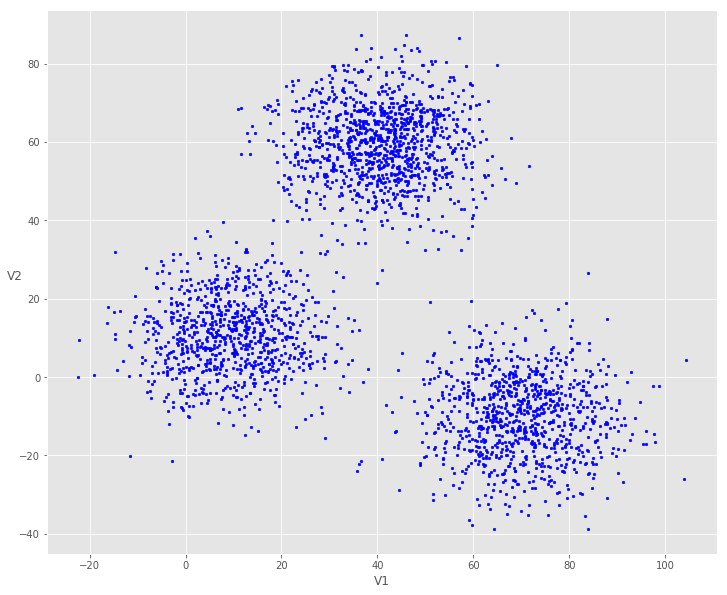

In [59]:
# plot the data
f1 = data['V1'].values
f2 = data['V2'].values
plt.figure(figsize=(12,10))
plt.scatter(data.iloc[:,0], data.iloc[:,1], s=7, c='b')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1], rotation=0)

#### The Algorithm

In [11]:
# Euclidean Distance Calculator
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [37]:
np.random.seed(42)

# Number of clusters = 3
k = 3

# max value of data to ensure random coords are within bounds
d_max = max(data['V1'].max(), data['V2'].max())

# X coordinates of random centroids
C_x = np.random.randint(0, d_max-20, size=k)
# Y coordinates of random centroids
C_y = np.random.randint(0, d_max-20, size=k)

C = np.array(list(zip(C_x, C_y)), dtype=np.float32)

C

array([[51., 60.],
       [14., 20.],
       [71., 82.]], dtype=float32)

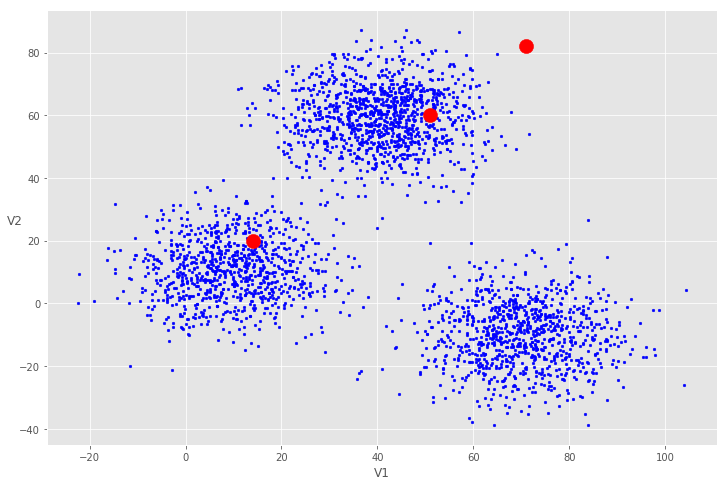

In [38]:
# Plotting the original data along with the centroids
plt.figure(figsize=(12,8))
plt.scatter(data.iloc[:,0], data.iloc[:,1], s=7, c='b')
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1], rotation=0)

plt.scatter(C_x, C_y, s=200, c='r')

In [69]:
# Helper matrix
X = np.dstack((data['V1'], data['V2']))[0]
X

array([[  2.072345,  -3.241693],
       [ 17.93671 ,  15.78481 ],
       [  1.083576,   7.319176],
       ...,
       [ 64.46532 , -10.50136 ],
       [ 90.72282 , -12.25584 ],
       [ 64.87976 , -24.87731 ]])

In [70]:
# To store the value of centroids when it updates
C_old = np.zeros(C.shape)

# Cluster labels (0, 1, 2)
clusters = np.zeros(len(X))

# Error function - distance between new centroids and old centroids
error = dist(C, C_old, None)

# Loop will run until the error becomes zero
while error != 0:
    # Assigning each value to its closest cluster
    for i in range(len(X)):
        distances = dist(X[i], C)
        cluster = np.argmin(distances)
        clusters[i] = cluster
    # Storing old centroid values
    C_old = deepcopy(C)
    # Finding the new centroids by taking the average value
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    error = dist(C, C_old, None)

<Figure size 864x720 with 0 Axes>

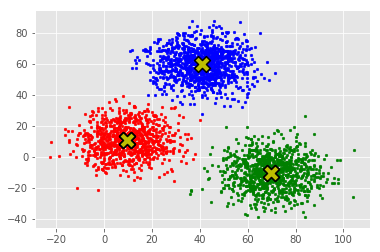

In [66]:
colors = ['r', 'g', 'b', 'y', 'c', 'm']
plt.figure(figsize=(12, 10))
fig, ax = plt.subplots()

for i in range(k):
    points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
    ax.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])
    ax.scatter(C[:, 0], C[:, 1], marker="X", s=250, 
               c='y', linewidth=1.5, edgecolor='k')

If we were to run this with the wrong K, we would get completely misleading clusters. For example:

![k=2](https://i.imgur.com/chdUE0r.png)
*K=2*

K=5
![k=5](https://i.imgur.com/cly9t5S.png)

# Implementation with scikit-learn
We'll use the same dataset

#### Elbow Method

Text(0.5, 1.0, 'The Elbow Method showing optimal k')

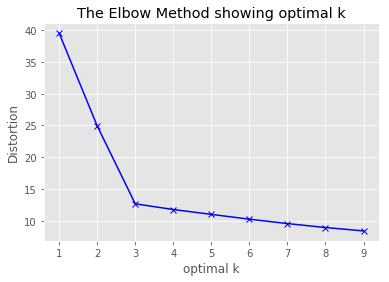

In [75]:
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist

# k means to determine k
distortions = []
K = range(1, 10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('optimal k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing optimal k')

### Algorithm

In [77]:
# number of clusters
kmeans = KMeans(n_clusters=3)

# fitting the input data
kmeans = kmeans.fit(X)

# getting cluster labels
labels = kmeans.predict(X)

# centroid values
centroids = kmeans.cluster_centers_

#### Comparing our values to scikit's

In [78]:
print(C)           # ours
print(centroids)   # scikit's

[[  9.478045  10.686052]
 [ 69.92419  -10.119641]
 [ 40.683628  59.715893]]
[[  9.4780459   10.686052  ]
 [ 40.68362784  59.71589274]
 [ 69.92418447 -10.11964119]]


The same! Just in different order.

## Scikit Example 2
We'll generate a new value using scikit's `make_blobs` function.

In [93]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)

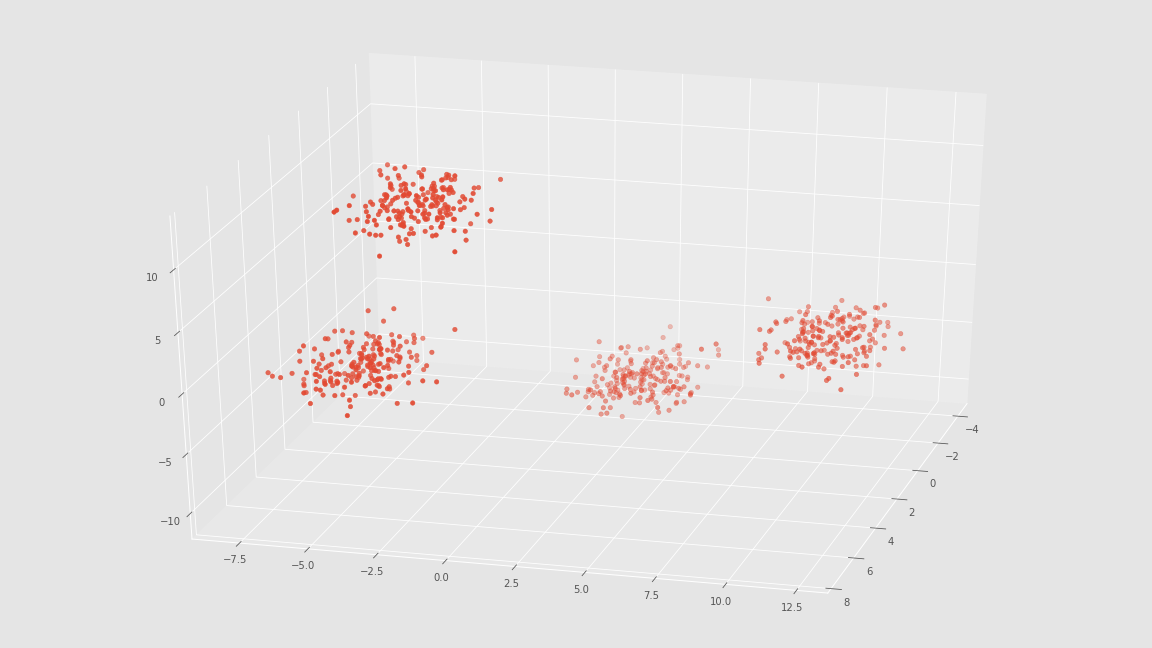

In [109]:
# to address the extremely small plot in matplotlib 2.0.0
%config InlineBackend.print_figure_kwargs = {'bbox_inches':None}

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])
ax.view_init(azim=15)

In [113]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)

# fitting the inputs
kmeans = kmeans.fit(X)

# predicting the clusters
labels = kmeans.predict(X)

# getting the cluster centers
C = kmeans.cluster_centers_

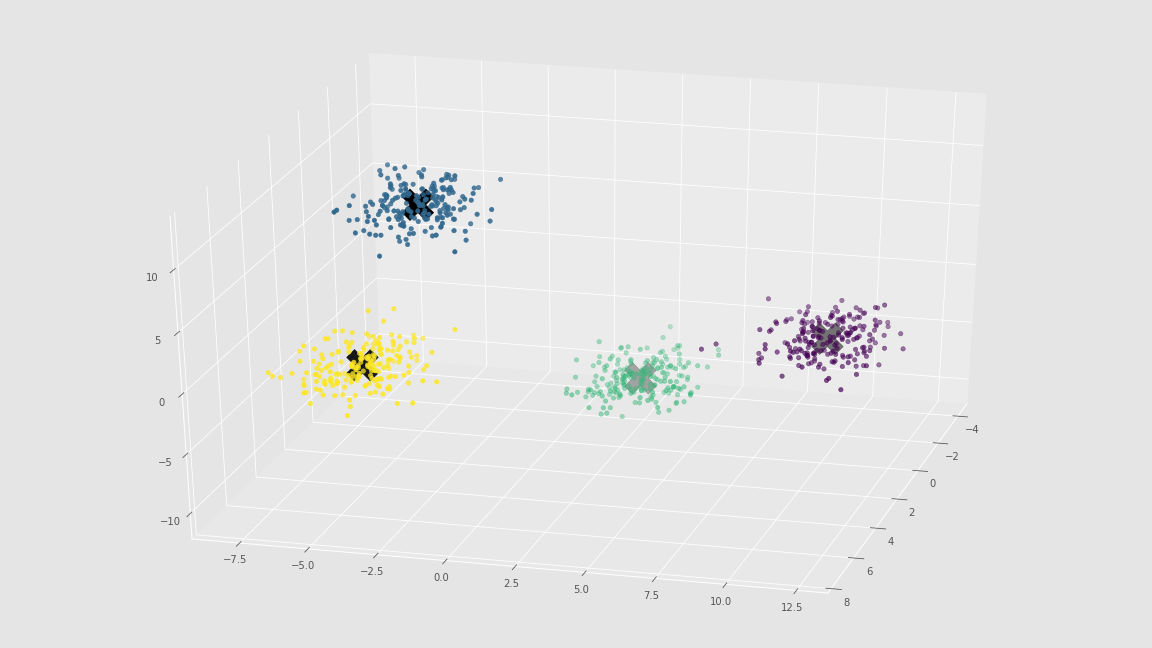

In [119]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='X', c='k', s=1000)
ax.view_init(azim=15)